In [298]:
''' THIS CODE IS MY OWN WORK . IT WAS WRITTEN WITHOUT
CONSULTING CODE WRITTEN BY OTHER STUDENTS OR RELYING
SOLELY ON LARGE LANGUAGE MODELS SUCH AS CHATGPT .
Zenaid Zhu '''

' THIS CODE IS MY OWN WORK . IT WAS WRITTEN WITHOUT\nCONSULTING CODE WRITTEN BY OTHER STUDENTS OR RELYING\nSOLELY ON LARGE LANGUAGE MODELS SUCH AS CHATGPT .\nZenaid Zhu '

# Analysis for Impostor Bias study

## Load and clean data

In [299]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
# Load dataframe
csvfilename = "Qualtrics/12-13.csv"

df = pd.read_csv(csvfilename)

# Remove row 1 (Just contains text of questions)
df = df.drop(index=1)



# Initial Data Cleanup

# Remove all responses where Group is blank or NaN (Experimental or Control group was not recorded)
df = df[df["Group"].notna() & (df["Group"] != "")]

# Only keep responses where progress is 100
df = df[df["Progress"] == "100"]


## Survey Results

Demographic Questions

Age
18     3.030303
19     3.030303
20     6.060606
21    42.424242
22    18.181818
23    12.121212
25     6.060606
28     6.060606
29     3.030303
Name: proportion, dtype: float64


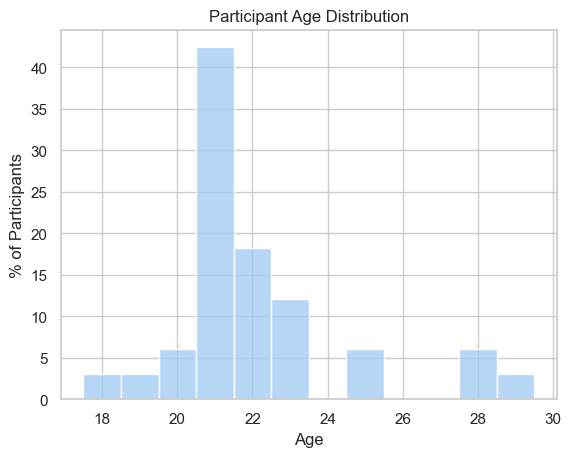

In [301]:
# Age percents

df["Age"] = pd.to_numeric(df["Age"])

age_percent = df["Age"].value_counts(normalize=True).sort_index() * 100
print(age_percent)

# Age histogram

sns.set_palette("pastel") 

plt.figure()
sns.histplot(data=df, x = "Age", binwidth=1, discrete=True, stat="percent")
plt.xlabel("Age")
plt.ylabel("% of Participants")
plt.title("Participant Age Distribution")

plt.savefig("Figures/dem_age.png", dpi=300)


                 Gender  proportion
0                  Male   42.424242
1                Female   42.424242
2             Nonbinary    6.060606
3       Nonbinary,Other    3.030303
4  Prefer not to answer    3.030303
5                 Other    3.030303


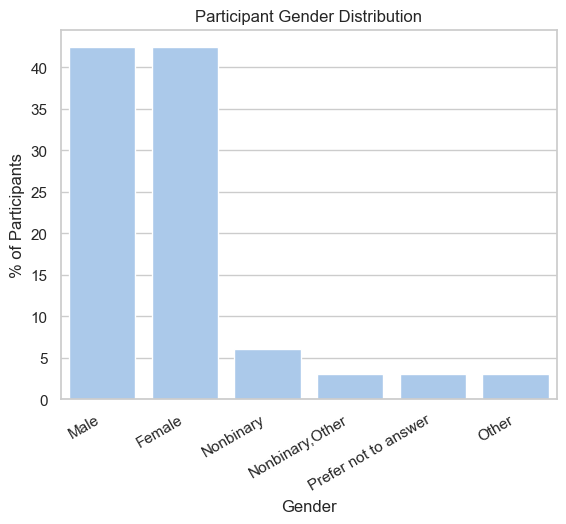

In [302]:
# Gender percents

# Need to convert count to percents
gender_percent = df["Gender"].value_counts(normalize=True).mul(100).reset_index()
print(gender_percent)

# Gender Bar Chart
gender_percent.columns = ["Gender", "Percent"]

sns.set_palette("pastel") 

plt.figure()

order = df["Gender"].value_counts().index
sns.barplot(data=gender_percent, x="Gender", y="Percent", order=order)

plt.xlabel("Gender")
plt.ylabel("% of Participants")
plt.title("Participant Gender Distribution")
plt.xticks(rotation=30, ha="right")
plt.savefig("Figures/dem_gender.png", dpi=300)


                              Race  proportion
0                            Asian   48.484848
1                            White   18.181818
2               Hispanic or Latino    9.090909
3        Black or African American    9.090909
4                      Asian,White    6.060606
5  Middle Eastern or North African    6.060606
6         Asian,Hispanic or Latino    3.030303


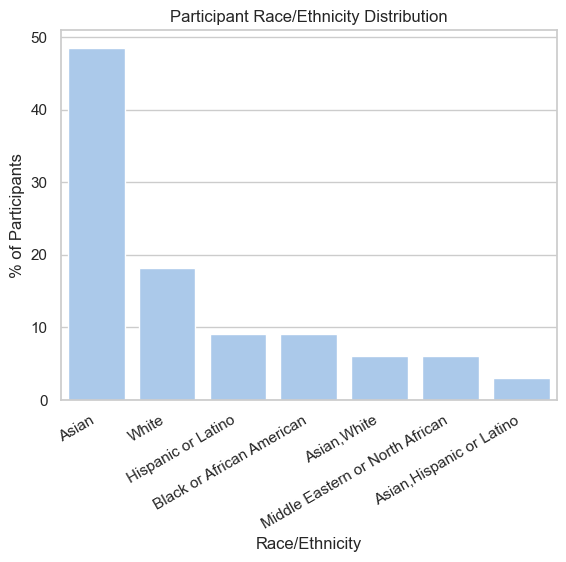

In [303]:
# Race/Ethnicity Bar Chart

# Need to convert count to percents
race_percent = df["Race"].value_counts(normalize=True).mul(100).reset_index()
print(race_percent)

# Race bar chart
race_percent.columns = ["Race", "Percent"]

sns.set_palette("pastel") 

plt.figure()

order = df["Race"].value_counts().index
sns.barplot(data=race_percent, x="Race", y="Percent", order=order)

plt.xlabel("Race/Ethnicity")
plt.ylabel("% of Participants")
plt.title("Participant Race/Ethnicity Distribution")
plt.xticks(rotation=30, ha="right")
plt.savefig("Figures/dem_race.png", dpi=300)


# sns.set_palette("pastel") 

# plt.figure()

# order = df["Race"].value_counts().index
# sns.countplot(data=df, x = "Race", order=order)
# plt.xlabel("Race and Ethnicity")
# plt.ylabel("Number of Participants")
# plt.title("Participant Race and Ethnicity Distribution")
# plt.xticks(rotation=30, ha="right")

AI Questionnaire Analysis plots

    Concern  proportion
0      Very   72.727273
1  Somewhat   27.272727


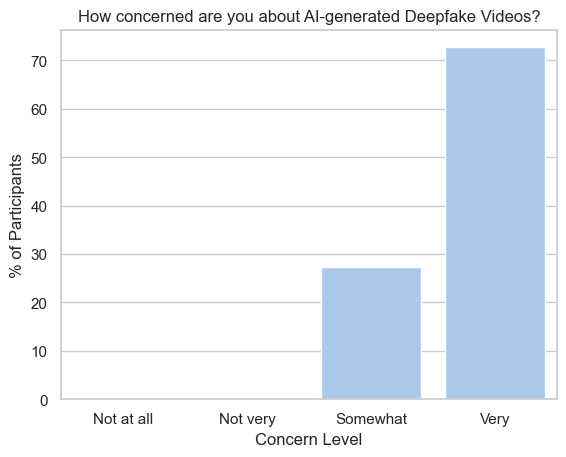

In [304]:
# How concerned are you about AI-generated Deepfake Videos?

# Need to convert count to percents
concern_percent = df["Concern"].value_counts(normalize=True).mul(100).reset_index()
print(concern_percent)

# bar chart
concern_percent.columns = ["Concern", "Percent"]

sns.set_palette("pastel") 

plt.figure()

order = ["Not at all", "Not very", "Somewhat", "Very"]
sns.barplot(data=concern_percent, x="Concern", y="Percent", order=order)

plt.xlabel("Concern Level")
plt.ylabel("% of Participants")
plt.title("How concerned are you about AI-generated Deepfake Videos?")
#plt.xticks(rotation=30, ha="right")
plt.savefig("Figures/question_concern.png", dpi=300)


# sns.set_palette("pastel") 

# plt.figure()

# sns.countplot(data=df, x = "Concern")
# #plt.xlabel("Race and Ethnicity")
# plt.ylabel("Number of Participants")
# plt.title("Responses: How concerned are you about AI-generated Deepfake Videos?")

                                         Trust  proportion
0  Do not trust online video content very much   45.454545
1          Trust online video content somewhat   45.454545
2         Trust online video content very much    6.060606
3     Do not trust online video content at all    3.030303


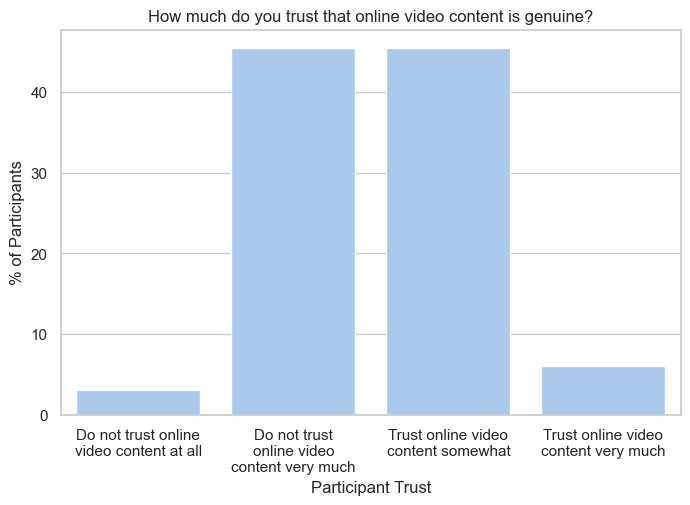

In [305]:
# How much do you trust that online video content is genuine?

# Need to convert count to percents
trust_percent = df["Trust"].value_counts(normalize=True).mul(100).reset_index()
print(trust_percent)

# bar chart
trust_percent.columns = ["Trust", "Percent"]
sns.set_palette("pastel") 
plt.figure(figsize=(8,5))

order = ["Do not trust online video content at all", "Do not trust online video content very much", "Trust online video content somewhat", "Trust online video content very much"]
sns.barplot(data=trust_percent, x="Trust", y="Percent", order=order)

plt.xlabel("Participant Trust")
plt.ylabel("% of Participants")
plt.title("How much do you trust that online video content is genuine?")

# Add newlines to x ticks to make answers fit, and make font smaller
labels=[
    "Do not trust online\nvideo content at all",
    "Do not trust\nonline video\ncontent very much",
    "Trust online video\ncontent somewhat",
    "Trust online video\ncontent very much"
]
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.savefig("Figures/question_trust.png", dpi=300)

         Check  proportion
0    Sometimes   54.545455
1  Every video   27.272727
2       Rarely   15.151515
3        Never    3.030303


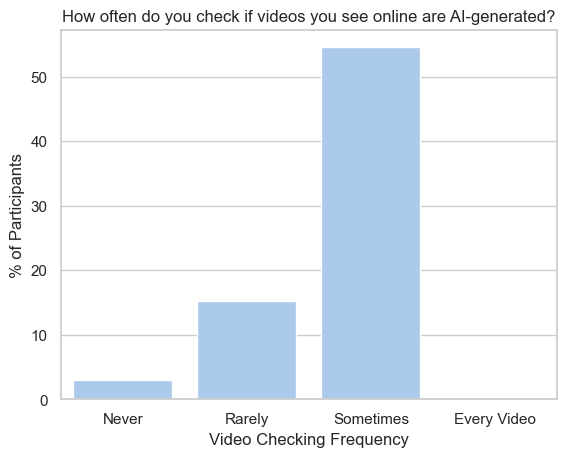

In [306]:
# How often do you check if videos you see online are AI-generated?

# Need to convert count to percents
check_percent = df["Check"].value_counts(normalize=True).mul(100).reset_index()
print(check_percent)

# create bar chart
check_percent.columns = ["Check", "Percent"]

sns.set_palette("pastel") 

plt.figure()

order = ["Never", "Rarely", "Sometimes", "Every Video"]
sns.barplot(data=check_percent, x="Check", y="Percent", order=order)

plt.xlabel("Video Checking Frequency")
plt.ylabel("% of Participants")
plt.title("How often do you check if videos you see online are AI-generated?")
plt.savefig("Figures/question_check.png", dpi=300)

Classification tasks Analysis plots

In [307]:
# Separate columns into each question group:

# Classification 1
real1_cols = [
    "1Real1", "1Real2", "1Real3", "1Real4", "1Real5", "1Real6", "1Real7", "1Real8"
]

real2_cols = [
    "2Real1", "2Real2", "2Real3", "2Real4", "2Real5", "2Real6", "2Real7", "2Real8"
]

AI1_cols = [
    "1AI1",  "1AI2",  "1AI3",  "1AI4",  "1AI5",  "1AI6",  "1AI7",  "1AI8"
]

AI2_cols = [
    "2AI1",  "2AI2",  "2AI3",  "2AI4",  "2AI5",  "2AI6",  "2AI7",  "2AI8"
]

#Classification task 2

real3_cols = [
    "3Real1", "3Real2", "3Real3", "3Real4", "3Real5", "3Real6", "3Real7", "3Real8"
]

real4_cols = [
    "4Real1", "4Real2", "4Real3", "4Real4", "4Real5", "4Real6", "4Real7", "4Real8"
]

AI3_cols = [
    "3AI1",  "3AI2",  "3AI3",  "3AI4",  "3AI5",  "3AI6",  "3AI7",  "3AI8"
]

AI4_cols = [
    "4AI1",  "4AI2",  "4AI3",  "4AI4",  "4AI5",  "4AI6",  "4AI7",  "4AI8",
]

#combine each question group into one column per participant
# first column after bfill contains the non-NaN value
df["real1"] = df[real1_cols].bfill(axis=1).iloc[:,0]
df["real2"] = df[real2_cols].bfill(axis=1).iloc[:,0]
df["real3"] = df[real3_cols].bfill(axis=1).iloc[:,0]
df["real4"] = df[real4_cols].bfill(axis=1).iloc[:,0]
df["AI1"] = df[AI1_cols].bfill(axis=1).iloc[:,0]
df["AI2"] = df[AI2_cols].bfill(axis=1).iloc[:,0]
df["AI3"] = df[AI3_cols].bfill(axis=1).iloc[:,0]
df["AI4"] = df[AI4_cols].bfill(axis=1).iloc[:,0]
#print(df["AI4"])


In [308]:
# Replace string answer values with TN, TP, FN, or FP depending on answer and whether it is an AI-generated video

combined_real_cols = ["real1", "real2", "real3", "real4"]
combined_ai_cols = ["AI1", "AI2", "AI3", "AI4"]

# If answer contains "genuine", it becomes TN, else if it contains "AI" then it becomes FP
# if it contains neither it was already acted upon and doesn't need to be changed!!!
for col in combined_real_cols:
    df[col] = np.where(
        df[col].str.contains("genuine", case=False, na=False),"TN",
        np.where(
            df[col].str.contains("AI", case=False, na=False),"FP", df[col]
        )
    )

for col in combined_ai_cols:
    df[col] = np.where(
        df[col].str.contains("genuine", case=False, na=False),"FN",
        np.where(
            df[col].str.contains("AI", case=False, na=False), "TP", df[col]
        )
    )


In [309]:
# Prepare categories for final figures

# Also separate out Experimental and Control dataframes
exp_df = df[df["Group"] == "Experimental"]
print(f"exp_df shape: {exp_df.shape}")

con_df = df[df["Group"] == "Control"]
print(f"con_df shape: {con_df.shape}")

# Classification 1: Stack real1 + real2 + AI1 + AI2
class1_cols = ["real1", "real2", "AI1", "AI2"]

# Classification 2: Stack real3 + real4 + AI1 + AI2
class2_cols = ["real3", "real4", "AI3", "AI4"]



exp_df shape: (16, 96)
con_df shape: (17, 96)


  index  proportion
0    TP   33.823529
1    TN   32.352941
2    FP   17.647059
3    FN   16.176471


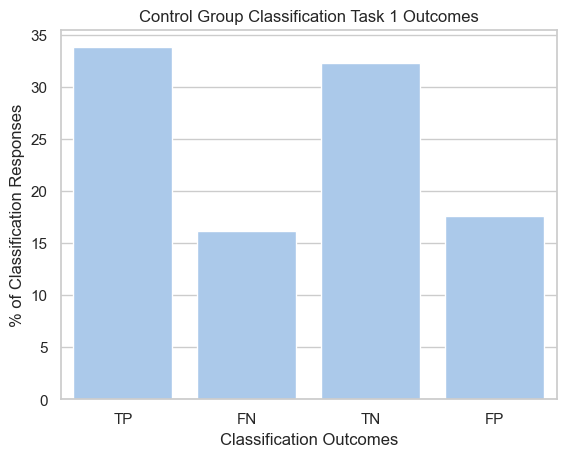

In [310]:
# Classification Task 1, CONTROL

con_class1_results = con_df[class1_cols].stack()
con_class1_percent = con_class1_results.value_counts(normalize=True).mul(100).reset_index()
print(con_class1_percent)

# create figure
con_class1_percent.columns = ["Result", "Percent"]

sns.set_palette("pastel")
plt.figure()

order = ["TP", "FN", "TN", "FP"]
sns.barplot(data=con_class1_percent, x="Result", y="Percent", order=order)

plt.xlabel("Classification Outcomes")
plt.ylabel("% of Classification Responses")
plt.title("Control Group Classification Task 1 Outcomes")
plt.savefig("Figures/class1_control.png", dpi=300)

  index  proportion
0    TN     37.5000
1    TP     32.8125
2    FN     17.1875
3    FP     12.5000


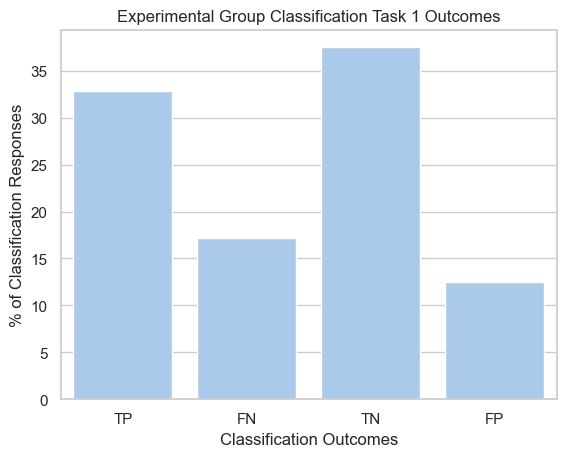

In [311]:
# Classification Task 1, EXPERIMENTAL

exp_class1_results = exp_df[class1_cols].stack()
exp_class1_percent = exp_class1_results.value_counts(normalize=True).mul(100).reset_index()
print(exp_class1_percent)

# create figure
exp_class1_percent.columns = ["Result", "Percent"]

sns.set_palette("pastel")
plt.figure()

order = ["TP", "FN", "TN", "FP"]
sns.barplot(data=exp_class1_percent, x="Result", y="Percent", order=order)

plt.xlabel("Classification Outcomes")
plt.ylabel("% of Classification Responses")
plt.title("Experimental Group Classification Task 1 Outcomes")

plt.savefig("Figures/class1_experimental.png", dpi=300)

  index  proportion
0    TP   32.352941
1    TN   30.882353
2    FP   19.117647
3    FN   17.647059


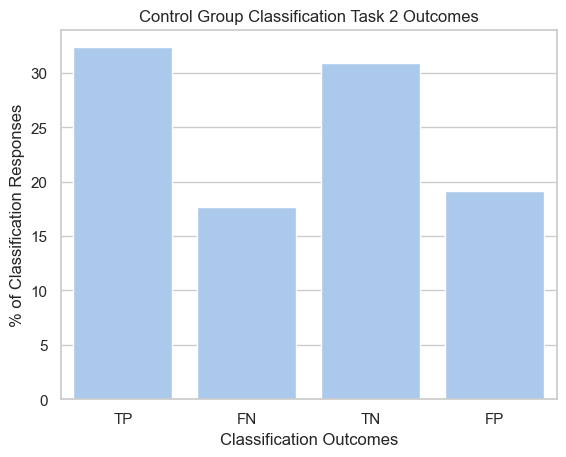

In [312]:
# Classification Task 2, CONTROL

con_class2_results = con_df[class2_cols].stack()
con_class2_percent = con_class2_results.value_counts(normalize=True).mul(100).reset_index()
print(con_class2_percent)

# create figure
con_class2_percent.columns = ["Result", "Percent"]

sns.set_palette("pastel")
plt.figure()

order = ["TP", "FN", "TN", "FP"]
sns.barplot(data=con_class2_percent, x="Result", y="Percent", order=order)

plt.xlabel("Classification Outcomes")
plt.ylabel("% of Classification Responses")
plt.title("Control Group Classification Task 2 Outcomes")
plt.savefig("Figures/class2_control.png", dpi=300)

  index  proportion
0    TN     39.0625
1    TP     35.9375
2    FN     14.0625
3    FP     10.9375


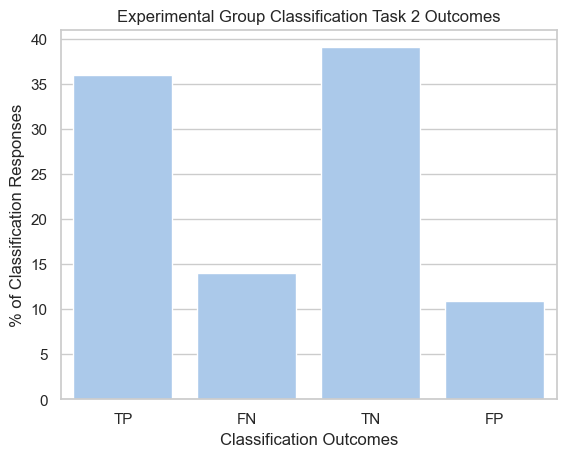

In [313]:
# Classification Task 2, EXPERIMENTAL

exp_class2_results = exp_df[class2_cols].stack()
exp_class2_percent = exp_class2_results.value_counts(normalize=True).mul(100).reset_index()
print(exp_class2_percent)

# create figure
exp_class2_percent.columns = ["Result", "Percent"]

sns.set_palette("pastel")
plt.figure()

order = ["TP", "FN", "TN", "FP"]
sns.barplot(data=exp_class2_percent, x="Result", y="Percent", order=order)

plt.xlabel("Classification Outcomes")
plt.ylabel("% of Classification Responses")
plt.title("Experimental Group Classification Task 2 Outcomes")

plt.savefig("Figures/class2_experimental.png", dpi=300)